In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 复数运算

In [11]:
a = 1+5j
a

(1+5j)

In [12]:
b = complex(2,3)
b

(2+3j)

In [13]:
a.real

1.0

In [14]:
b.imag

3.0

## 计算电磁场衰减曲线

In [15]:
mu = 4*np.pi*(1e-7)
f = 10
sigma = 0.1
omega  = 2*np.pi*f
z = np.arange(0, 10020, 20)
k = (1-1j)*np.sqrt((mu*sigma*omega)/2)
ex = np.exp(-k*z)
real = ex.real
imag = ex.imag

(-0.5, 1.0)

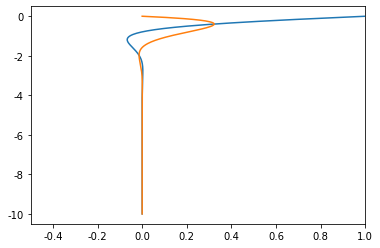

In [16]:
plt.plot(real, -z*0.001)
plt.plot(imag, -z*0.001)
plt.xlim(-0.5, 1.0)

In [17]:
def valuex(f):
    mu = 4*np.pi*(1e-7)
    f = f
    sigma = 0.1
    omega  = 2*np.pi*f
    z = np.arange(0, 10020, 20)
    k = (1-1j)*np.sqrt((mu*sigma*omega)/2)
    ex = np.exp(-k*z)
    return ex

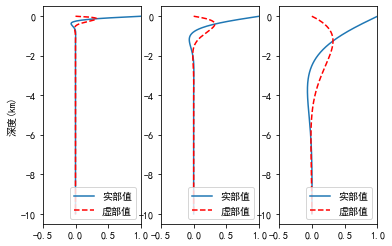

In [18]:
z0 = -z*0.001
ex100 = valuex(100)
ex10 = valuex(10)
ex1 = valuex(1)

# 设置中文显示
import matplotlib as mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

plt.subplot(131)
plt.plot(ex100.real, z0, label='实部值')
plt.plot(ex100.imag, z0, 'r--', label = '虚部值')
plt.xlim([-0.5, 1.0])
plt.legend(loc = 4)
plt.ylabel('深度(km)')

plt.subplot(132)
plt.plot(ex10.real, z0, label='实部值')
plt.plot(ex10.imag, z0, 'r--', label = '虚部值')
plt.xlim([-0.5, 1.0])
plt.legend(loc = 4)


plt.subplot(133)
plt.plot(ex1.real, z0, label='实部值')
plt.plot(ex1.imag, z0, 'r--', label = '虚部值')
plt.xlim([-0.5, 1.0])
plt.legend(loc = 4)

## 趋肤深度变化

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

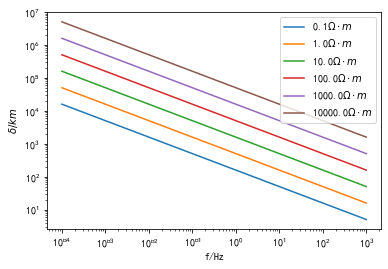

In [19]:
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

f = np.logspace(3, -4, 100)
rho = np.logspace(-1, 4, 6)


for i in rho:
    delta = 503*np.sqrt(i/f)
    plt.plot(f,delta, label = str(i)+r'$\Omega\cdot m$')
    plt.legend()
    plt.loglog()
plt.xlabel('f/Hz')
plt.ylabel(r'$\delta /km$')
plt.savefig(r'C:\Users\BXDM\Desktop\趋肤深度', dpi = 300)


In [20]:
np.logspace(-1,4,6)

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

## 拆分文件

In [21]:
import pandas as pd
file = pd.read_csv(r'text.txt', encoding = 'gbk', header = None)
df = pd.DataFrame(file)
df

,0
0,频率范围：10Hz～100KHz；
1,电源：12V，60Ah电瓶；
2,电极：4个BE-26型带缓冲器的有效高频偶极子以及4个不锈钢电极，26m电缆；
3,磁棒探头：2个BF-IM 磁感应棒（10Hz－100KHz），10m电缆；
4,模拟终端：1台AFE-EH4模拟讯号调节器，用它将两对电极和一对磁棒的数据据传至采集单元；
5,数据采集单元:道数：4道（2电，2磁）；内置计算机：IBM 兼容80486CPU 8Mb ...
6,数字信号处理器：①32位浮点；②带宽：DC-96KHz；
7,显示器：液晶VGA；
8,工作温度：-20～50℃。


In [22]:
for i in range(len(df)):
    line = df.iloc[i].values
    ls = line[0].split('：')[0]
    print(ls)

频率范围
电源
电极
磁棒探头
模拟终端
数据采集单元:道数
数字信号处理器
显示器
工作温度


In [23]:
line = df.iloc[i].values
str(line).split('：')[0]

"['工作温度"

In [24]:
line[0].split('：')[0]

'工作温度'

In [25]:
line

array(['工作温度：-20～50℃。'], dtype=object)

## 大地电磁一维正演

In [26]:
rho = [100, 1000]
h = [1800]
mu = (4e-7)*np.pi
T = np.logspace(-3, 4, 40)
m = len(rho) # 层数

In [27]:
k = np.zeros((len(rho), len(T)), dtype = np.complex)
for i in range(len(rho)):
    k[i] = np.sqrt((-1j*2*np.pi*mu)/(T*rho[i]))

In [28]:
Z = -(1j*mu*np.pi)/(T*k[m-1]) # python 的索引从 0 开始
layer = np.arange(m-1, 0, -1) # np.arange() 不包含 stop 参数
for n in layer: 
    A = -(1j*mu*2*np.pi)/(T*k[n-1])
    B = np.exp(-2*k[n-1]*h[n-1])
    Z = A*(A*(1-B)+Z*(1+B))/(A*(1+B)+Z*(1-B))

In [29]:
rho_a = (T/(mu*2*np.pi))*(np.abs(Z)**2)
phase = -np.arctan(Z.real/Z.imag)*180/np.pi

#### 函数形式

[]

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

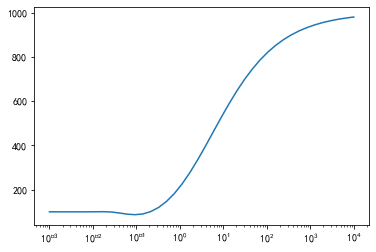

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

def mt1d_fwd(rho, h):
    mu = (4e-7)*np.pi
    T = np.logspace(-3, 4, 40)
    m = len(rho) # 层数
    
    k = np.zeros((len(rho), len(T)), dtype = np.complex)
    for i in range(len(rho)):
        k[i] = np.sqrt((-1j*2*np.pi*mu)/(T*rho[i]))
        
    Z = -(1j*2*mu*np.pi)/(T*k[m-1]) # python 的索引从 0 开始
    layer = np.arange(m-1, 0, -1) # np.arange() 不包含 stop 参数
    for n in layer:
        A = -(1j*mu*2*np.pi)/(T*k[n-1])
        B = np.exp(-2*k[n-1]*h[n-1])
        Z = A*(A*(1-B)+Z*(1+B))/(A*(1+B)+Z*(1-B))
    
    rho_a = (T/(mu*2*np.pi))*(np.abs(Z)**2)
    phase = -np.arctan(Z.real/Z.imag)*180/np.pi
    return [rho_a, phase]

rho = [100, 1000]
h = [1800]
data =  mt1d_fwd([100, 1000], [1800])
rho_a, ph = data
rho_a

plt.plot(T, rho_a)
plt.semilogx()

In [31]:
rho_a

array([ 99.99999997, 100.00000191,  99.99995151, 100.00099427,
        99.99068883,  99.98711662, 100.28828822, 100.583258  ,
        98.98586543,  94.45965018,  89.22808256,  87.01978328,
        90.57992763, 101.31613726, 119.92820844, 146.83525333,
       182.23706883, 225.97587905, 277.36049351, 335.06988333,
       397.20482039, 461.49327344, 525.59081649, 587.3819989 ,
       645.19960304, 697.92316253, 744.96604393, 786.18891237,
       821.78216451, 852.14960554, 877.81115915, 899.33051358,
       917.26640029, 932.14301675, 944.43445998, 954.55863664,
       962.87712922, 969.69850021, 975.28334079, 979.84998533])

In [32]:
b = np.random.randint(0,10,size=8)
b

array([3, 2, 5, 2, 2, 1, 3, 9])

In [33]:
c = np.zeros((3, 8), dtype = np.double)
c

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
for i in range(len(a)):
    c[i, :] = a[i]*b
c

TypeError: object of type 'complex' has no len()

In [ ]:
for i in range(1,len(a)+1):
    print(i)

In [ ]:
rho[0]

In [ ]:
1-1j

In [ ]:
k[:,1]

In [ ]:
2j

In [ ]:
np.tan(np.pi/2)

In [ ]:
np.arctan(1.6)

In [ ]:
np.pi/2

In [ ]:
b = np.array([[1, 2], [ 3, 4]])
b

In [ ]:
a = np.array([[3,3], [3, 3]])
a

In [ ]:
1j

In [ ]:
-1j

#### Bostick反演

[]

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

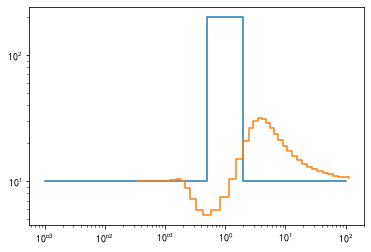

In [39]:
rho_a, ph = mt1d_fwd([10, 200, 10], [500, 2000])
T = np.logspace(-3, 4, 40)
mu = (4e-7)*np.pi
D = np.sqrt((rho_a*T)/(2*np.pi*mu))
rho_h = rho_a*(180/(2*ph)-1)
plt.figure()
depth = np.array([1, 500, 2000, 100000])
rho = [10, 200, 10, 10]
# 理论模型
plt.plot(depth/1000, rho, drawstyle = 'steps-post')
plt.plot(D/1000, rho_h, drawstyle = 'steps-post')
plt.loglog()

In [36]:
plt.figure()
h = np.diff(D)
rho_a1, ph1 = mt1d_fwd(pd, h)
plt.subplot(211)
plt.plot(T, rho_a)
plt.plot(T, rho_a1)
plt.semilogx()

plt.subplot(212)
plt.plot(T, ph)
plt.plot(T, ph1)
plt.semilogx()

TypeError: object of type 'module' has no len()

<Figure size 432x288 with 0 Axes>